Machine Learning Project: Regression

Problem Statement:
Create a machine learning model which will help the company in determining the salary of newly
hired employees using the given data.

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
case_data = pd.read_csv("ML case Study.csv", header=0)
case_data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [3]:
#Loading the auxillary data'set
city_type_list = pd.read_csv('cities.csv', header= 0)
city_type_list.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [4]:
college_tier_list = pd.read_csv('Colleges.csv', header=0)
college_tier_list.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
#Making a function to join the data of diffrent files into one
def get_college_tier(college):
    if college in college_tier_list['Tier 1'].tolist():
        return 'Tier 1'
    elif college in college_tier_list['Tier 2'].tolist():
        return 'Tier 2'
    elif college in college_tier_list['Tier 3'].tolist():
        return 'Tier 3'
    else:
        return 'No Tier'

In [6]:
def get_city_type(city):
    if city in city_type_list['Metrio City'].tolist():
        return 'Metro_city'
    elif city in city_type_list['non-metro cities'].tolist():
        return 'Non_Metro_city'
    else:
        return 'No_data_available'

In [7]:
case_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


We can see: 
1) This contains 8 features and the data doesn't contain any null values
2) The data contains object(3) , float(2) and int(3) type data

In [8]:
#Checking the descriptive statistics of data
case_data.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


We can see: 
1) The mean of all numerical features are roughly equal to the 50% i.e. their may be no outliers in the dataset

In [9]:
#Merging the data of diffrent files and removing the dependent variable
case_data['college_tier'] = case_data['College'].apply(get_college_tier)
case_data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1


In [10]:
case_data['city_type'] = case_data['City'].apply(get_city_type)
case_data.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city_type
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,Tier 2,Non_Metro_city
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,Tier 2,Non_Metro_city
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,Tier 3,Non_Metro_city
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,Tier 3,Non_Metro_city
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,Tier 1,Non_Metro_city


In [11]:
#Deleting the dependent features that are not required
del case_data['College']
del case_data['City']
case_data.head()

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city_type
0,Manager,55523.0,3,66,19,71406.58,Tier 2,Non_Metro_city
1,Executive,57081.0,1,84,18,68005.87,Tier 2,Non_Metro_city
2,Executive,60347.0,2,52,28,76764.02,Tier 3,Non_Metro_city
3,Executive,49010.0,2,81,33,82092.39,Tier 3,Non_Metro_city
4,Executive,57879.0,4,74,32,73878.10,Tier 1,Non_Metro_city


In [12]:
case_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Role                 1589 non-null   object 
 1   Previous CTC         1589 non-null   float64
 2   Previous job change  1589 non-null   int64  
 3   Graduation Marks     1589 non-null   int64  
 4   EXP (Month)          1589 non-null   int64  
 5   CTC                  1589 non-null   float64
 6   college_tier         1589 non-null   object 
 7   city_type            1589 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


we can see: 
1) the data contains 8 features with dtypes float64(2), int64(3), object(3)
2) their are no null values in data

Univariate Analysis

In [13]:
#for feature 'Role'
case_data['Role'].value_counts()

Role
Executive    1261
Manager       328
Name: count, dtype: int64

<Axes: xlabel='Role', ylabel='count'>

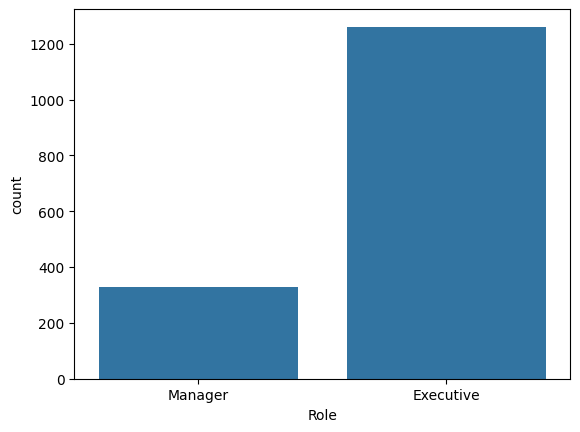

In [15]:
sns.countplot(x='Role', data=case_data)

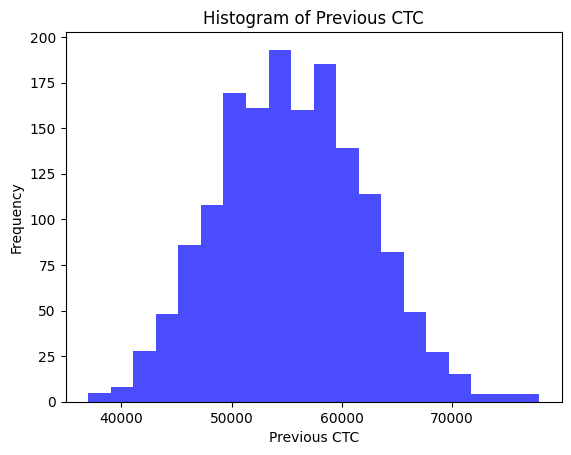

In [16]:
#for feature 'Previous CTC'
plt.hist(case_data['Previous CTC'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Previous CTC')
plt.ylabel('Frequency')
plt.title('Histogram of Previous CTC')
plt.show()

We see
1) the feature data is in range of ~37000 to ~80000
2) The rnge 54000 to 56000 has the highest count value

<Axes: xlabel='Previous CTC'>

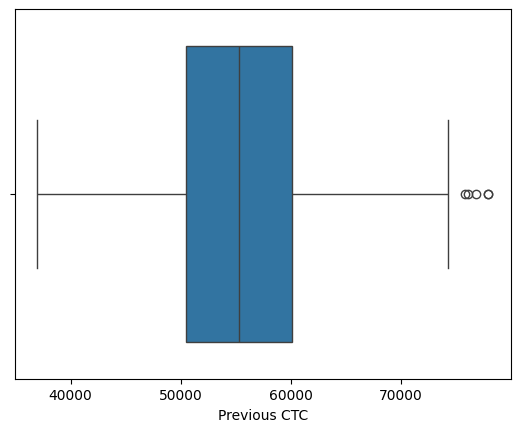

In [19]:
sns.boxplot(x='Previous CTC', data=case_data)

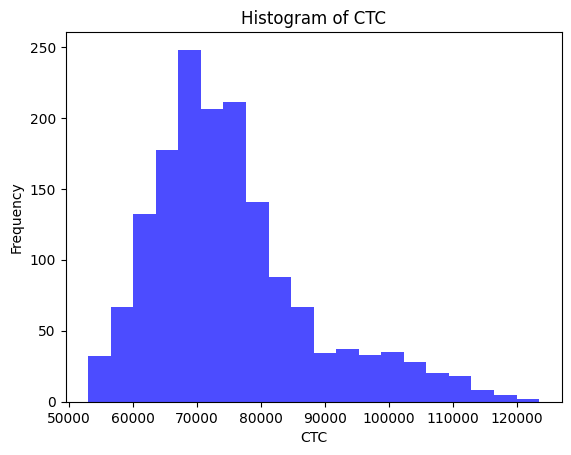

In [18]:
plt.hist(case_data['CTC'], bins=20, color='blue', alpha=0.7)
plt.xlabel('CTC')
plt.ylabel('Frequency')
plt.title('Histogram of CTC')
plt.show()

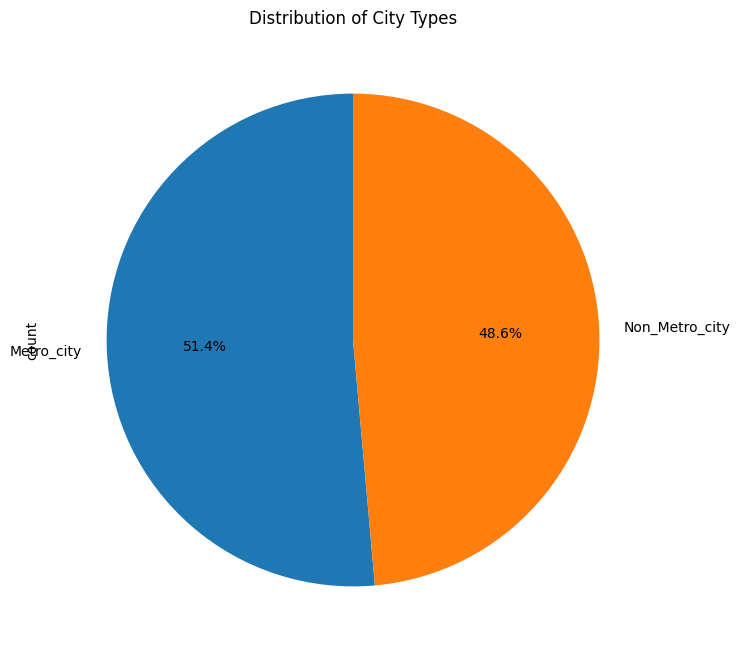

In [21]:
#for feature city type 
plt.figure(figsize=(8, 8))
case_data['city_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of City Types')
plt.show()

There are no null values here

<Axes: xlabel='EXP (Month)', ylabel='Density'>

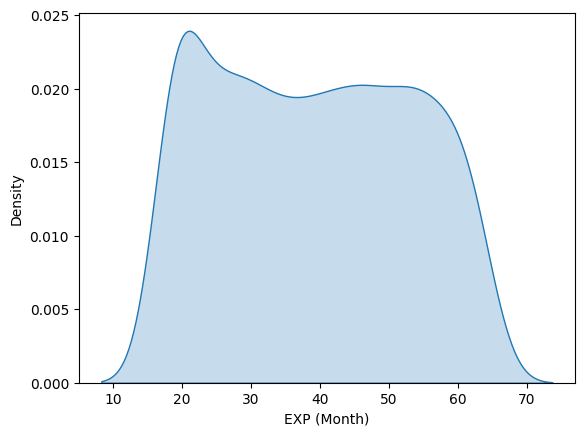

In [22]:
sns.kdeplot(case_data['EXP (Month)'], fill=True) 

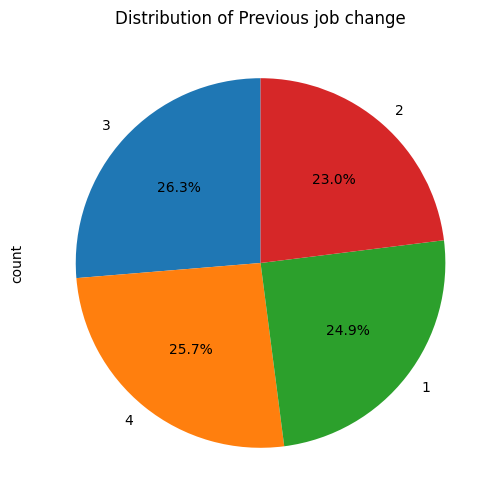

In [24]:
plt.figure(figsize=(6, 6))
case_data['Previous job change'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Previous job change')
plt.show()

<Axes: xlabel='Graduation Marks', ylabel='Density'>

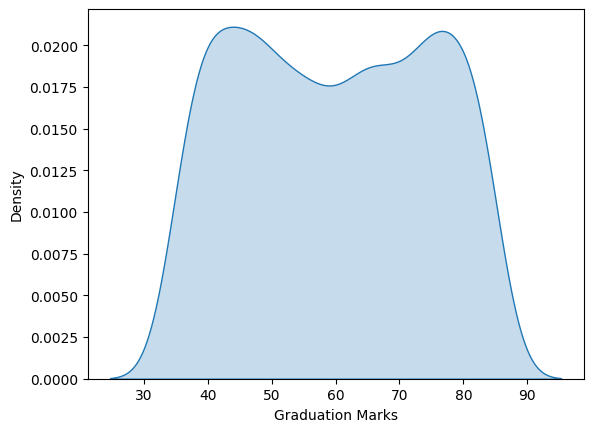

In [25]:
sns.kdeplot(case_data['Graduation Marks'], fill=True)

Multivariate Analysis

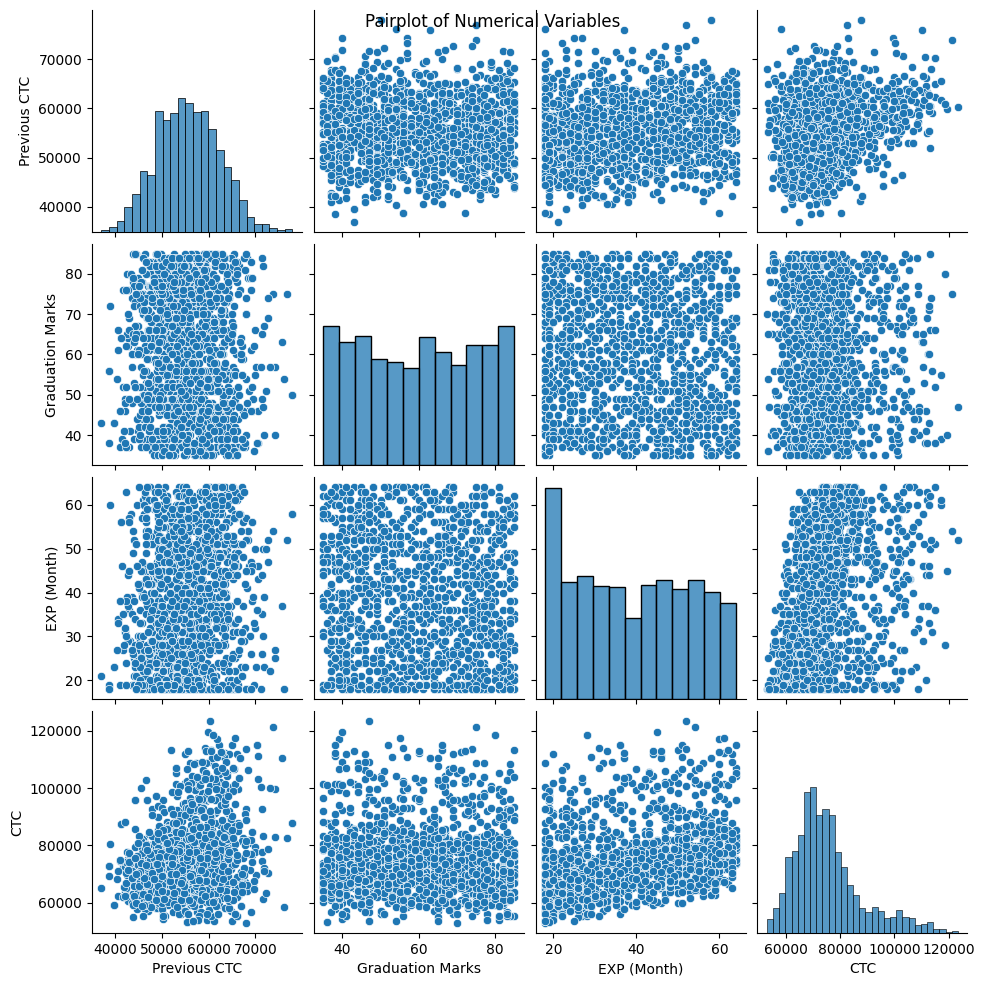

In [26]:
sns.pairplot(case_data, vars=['Previous CTC', 'Graduation Marks', 'EXP (Month)', 'CTC'])
plt.suptitle('Pairplot of Numerical Variables')
plt.show()

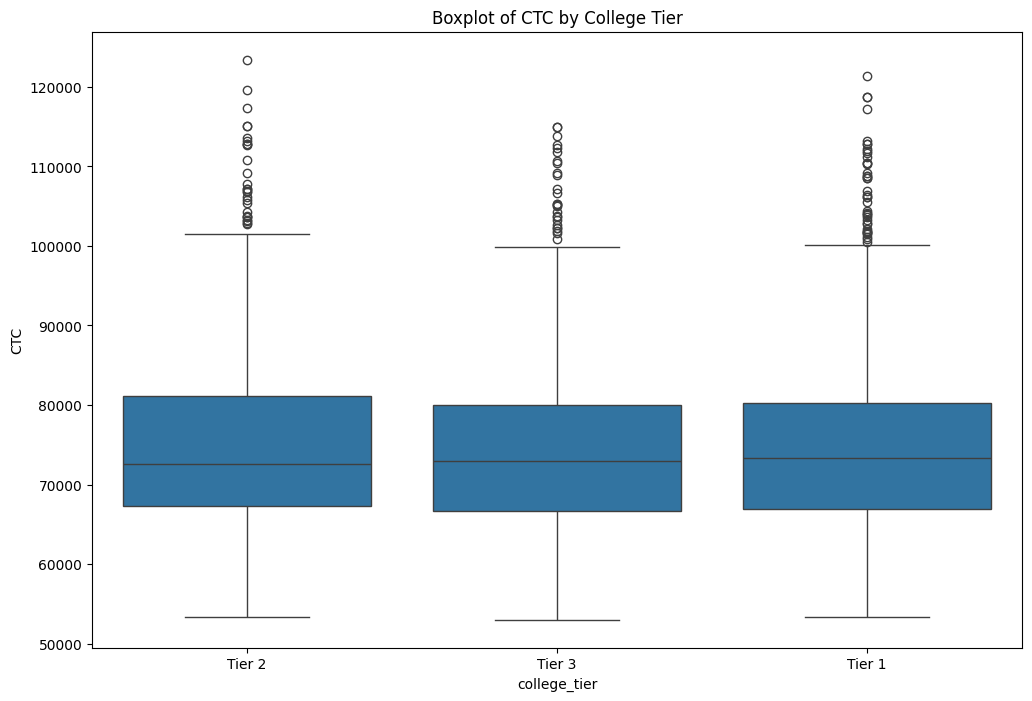

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='college_tier', y='CTC', data=case_data)
plt.title('Boxplot of CTC by College Tier')
plt.show()

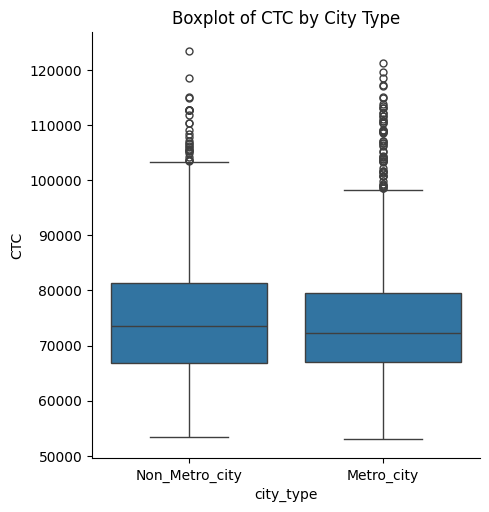

In [28]:
sns.catplot(x='city_type', y='CTC', data=case_data, kind='box')
plt.title('Boxplot of CTC by City Type')
plt.show()

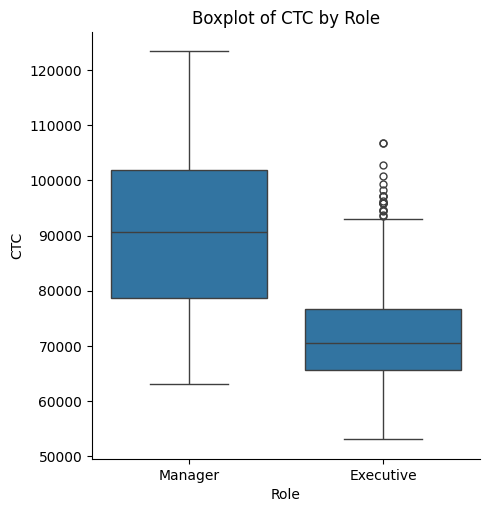

In [29]:
sns.catplot(x='Role', y='CTC', data=case_data, kind='box')
plt.title('Boxplot of CTC by Role')
plt.show()

In [36]:
feature_data = pd.DataFrame() #Creating a new dataframe for further feature eng. so that the original data is not lost
feature_data = case_data
feature_data['Role+city+college'] =feature_data['Role']+feature_data['city_type']+feature_data['college_tier']

In [37]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Role                 1589 non-null   object 
 1   Previous CTC         1589 non-null   float64
 2   Previous job change  1589 non-null   int64  
 3   Graduation Marks     1589 non-null   int64  
 4   EXP (Month)          1589 non-null   int64  
 5   CTC                  1589 non-null   float64
 6   college_tier         1589 non-null   object 
 7   city_type            1589 non-null   object 
 8   Role+city+college    1589 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 111.9+ KB


In [39]:
feature_data['Role+city+college'].value_counts()

Role+city+college
ExecutiveMetro_cityTier 1        234
ExecutiveMetro_cityTier 3        222
ExecutiveNon_Metro_cityTier 1    220
ExecutiveNon_Metro_cityTier 3    209
ExecutiveMetro_cityTier 2        208
ExecutiveNon_Metro_cityTier 2    168
ManagerMetro_cityTier 1           64
ManagerNon_Metro_cityTier 3       62
ManagerNon_Metro_cityTier 1       60
ManagerNon_Metro_cityTier 2       53
ManagerMetro_cityTier 3           46
ManagerMetro_cityTier 2           43
Name: count, dtype: int64

In [40]:
del feature_data['Role']  
del feature_data['city_type']
del feature_data['college_tier']
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   float64
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   Role+city+college    1589 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 74.6+ KB


<Figure size 2000x2000 with 0 Axes>

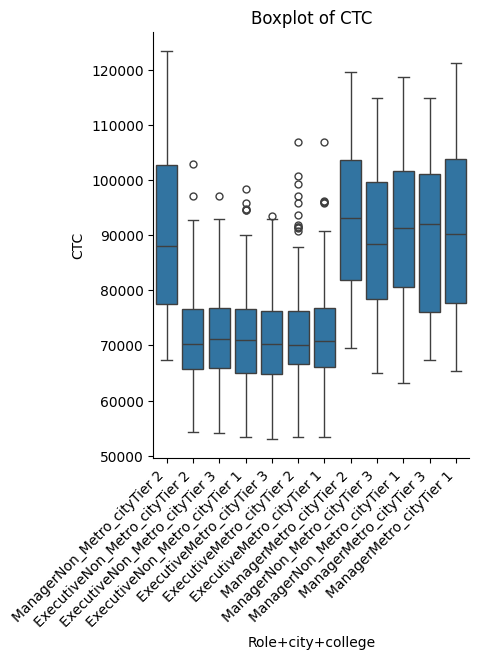

In [42]:
plt.figure(figsize=(20, 20))
sns.catplot(x=feature_data['Role+city+college'], y=feature_data['CTC'],  kind='box')
plt.title('Boxplot of CTC')
plt.xticks(rotation=45, ha='right')
plt.show()

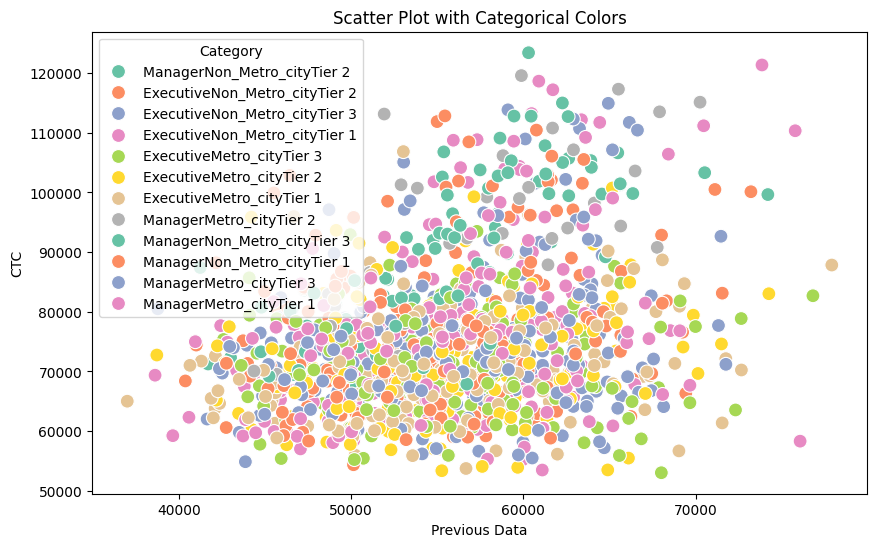

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous CTC', y='CTC', hue='Role+city+college', data=feature_data, palette='Set2', s=100)
plt.xlabel('Previous Data')
plt.ylabel('CTC')
plt.title('Scatter Plot with Categorical Colors')
plt.legend(title='Category')

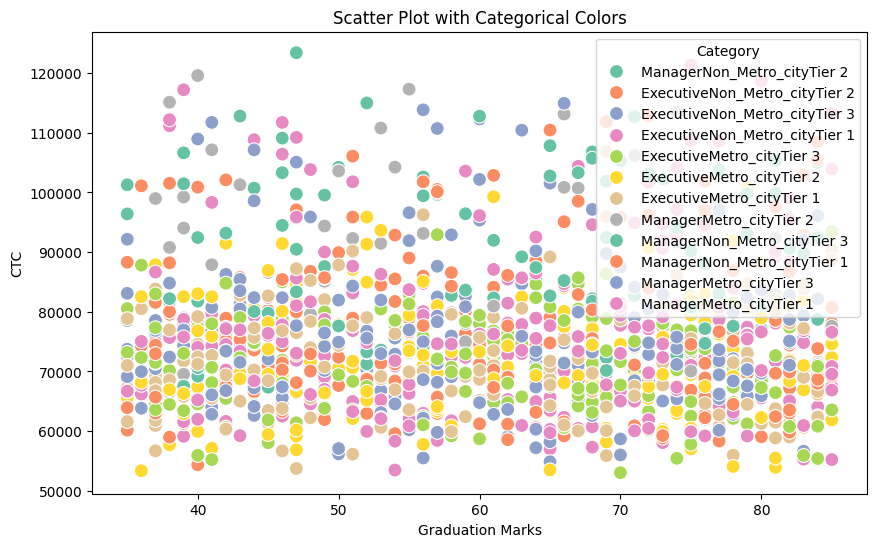

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Graduation Marks', y='CTC', hue='Role+city+college', data=feature_data, palette='Set2', s=100)
plt.xlabel('Graduation Marks')
plt.ylabel('CTC')
plt.title('Scatter Plot with Categorical Colors')
plt.legend(title='Category')

Data Cleaning

In [49]:
feature_data.isnull().sum()

Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role+city+college      0
dtype: int64

Their are no null data

In [50]:
#Creating dummies for data
feature_data = pd.get_dummies(feature_data,columns = ["Role+city+college"],drop_first = True)
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Previous CTC                                     1589 non-null   float64
 1   Previous job change                              1589 non-null   int64  
 2   Graduation Marks                                 1589 non-null   int64  
 3   EXP (Month)                                      1589 non-null   int64  
 4   CTC                                              1589 non-null   float64
 5   Role+city+college_ExecutiveMetro_cityTier 2      1589 non-null   bool   
 6   Role+city+college_ExecutiveMetro_cityTier 3      1589 non-null   bool   
 7   Role+city+college_ExecutiveNon_Metro_cityTier 1  1589 non-null   bool   
 8   Role+city+college_ExecutiveNon_Metro_cityTier 2  1589 non-null   bool   
 9   Role+city+college_ExecutiveNon

In [51]:
#Converting bool type features to int
bool_columns = feature_data.select_dtypes(include='bool').columns
feature_data[bool_columns] = feature_data[bool_columns].astype(int)
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Previous CTC                                     1589 non-null   float64
 1   Previous job change                              1589 non-null   int64  
 2   Graduation Marks                                 1589 non-null   int64  
 3   EXP (Month)                                      1589 non-null   int64  
 4   CTC                                              1589 non-null   float64
 5   Role+city+college_ExecutiveMetro_cityTier 2      1589 non-null   int32  
 6   Role+city+college_ExecutiveMetro_cityTier 3      1589 non-null   int32  
 7   Role+city+college_ExecutiveNon_Metro_cityTier 1  1589 non-null   int32  
 8   Role+city+college_ExecutiveNon_Metro_cityTier 2  1589 non-null   int32  
 9   Role+city+college_ExecutiveNon

In [52]:
feature_data.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role+city+college_ExecutiveMetro_cityTier 2,Role+city+college_ExecutiveMetro_cityTier 3,Role+city+college_ExecutiveNon_Metro_cityTier 1,Role+city+college_ExecutiveNon_Metro_cityTier 2,Role+city+college_ExecutiveNon_Metro_cityTier 3,Role+city+college_ManagerMetro_cityTier 1,Role+city+college_ManagerMetro_cityTier 2,Role+city+college_ManagerMetro_cityTier 3,Role+city+college_ManagerNon_Metro_cityTier 1,Role+city+college_ManagerNon_Metro_cityTier 2,Role+city+college_ManagerNon_Metro_cityTier 3
0,55523.0,3,66,19,71406.58,0,0,0,0,0,0,0,0,0,1,0
1,57081.0,1,84,18,68005.87,0,0,0,1,0,0,0,0,0,0,0
2,60347.0,2,52,28,76764.02,0,0,0,0,1,0,0,0,0,0,0
3,49010.0,2,81,33,82092.39,0,0,0,0,1,0,0,0,0,0,0
4,57879.0,4,74,32,73878.10,0,0,1,0,0,0,0,0,0,0,0


<Axes: >

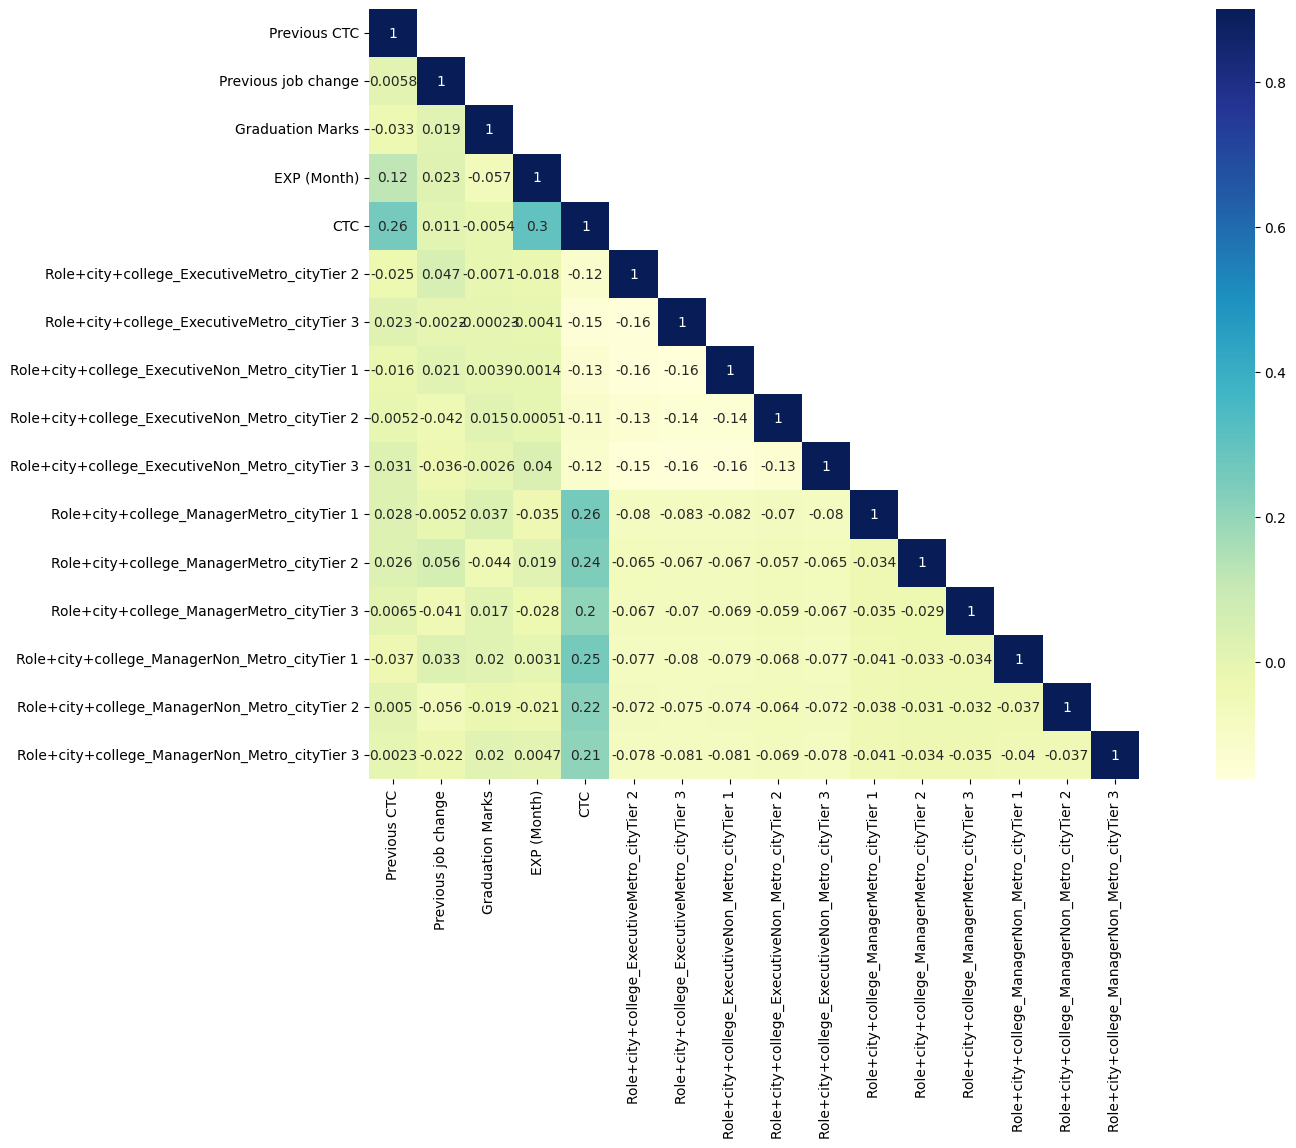

In [54]:
#Getting the correlation between the data
corr = feature_data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

Data splitting

In [55]:
train = feature_data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Previous CTC                                     1589 non-null   float64
 1   Previous job change                              1589 non-null   int64  
 2   Graduation Marks                                 1589 non-null   int64  
 3   EXP (Month)                                      1589 non-null   int64  
 4   CTC                                              1589 non-null   float64
 5   Role+city+college_ExecutiveMetro_cityTier 2      1589 non-null   int32  
 6   Role+city+college_ExecutiveMetro_cityTier 3      1589 non-null   int32  
 7   Role+city+college_ExecutiveNon_Metro_cityTier 1  1589 non-null   int32  
 8   Role+city+college_ExecutiveNon_Metro_cityTier 2  1589 non-null   int32  
 9   Role+city+college_ExecutiveNon

In [56]:
target = train['CTC']
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1589 entries, 0 to 1588
Series name: CTC
Non-Null Count  Dtype  
--------------  -----  
1589 non-null   float64
dtypes: float64(1)
memory usage: 12.5 KB


In [57]:
del train['CTC']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Previous CTC                                     1589 non-null   float64
 1   Previous job change                              1589 non-null   int64  
 2   Graduation Marks                                 1589 non-null   int64  
 3   EXP (Month)                                      1589 non-null   int64  
 4   Role+city+college_ExecutiveMetro_cityTier 2      1589 non-null   int32  
 5   Role+city+college_ExecutiveMetro_cityTier 3      1589 non-null   int32  
 6   Role+city+college_ExecutiveNon_Metro_cityTier 1  1589 non-null   int32  
 7   Role+city+college_ExecutiveNon_Metro_cityTier 2  1589 non-null   int32  
 8   Role+city+college_ExecutiveNon_Metro_cityTier 3  1589 non-null   int32  
 9   Role+city+college_ManagerMetro

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=0)

In [60]:
X_train.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role+city+college_ExecutiveMetro_cityTier 2,Role+city+college_ExecutiveMetro_cityTier 3,Role+city+college_ExecutiveNon_Metro_cityTier 1,Role+city+college_ExecutiveNon_Metro_cityTier 2,Role+city+college_ExecutiveNon_Metro_cityTier 3,Role+city+college_ManagerMetro_cityTier 1,Role+city+college_ManagerMetro_cityTier 2,Role+city+college_ManagerMetro_cityTier 3,Role+city+college_ManagerNon_Metro_cityTier 1,Role+city+college_ManagerNon_Metro_cityTier 2,Role+city+college_ManagerNon_Metro_cityTier 3
1062,61410.0,4,83,59,0,0,0,0,0,0,0,0,1,0,0
215,59781.0,1,46,41,0,0,0,0,0,0,0,0,0,0,0
654,62521.0,1,70,59,0,0,1,0,0,0,0,0,0,0,0
55,66624.0,1,63,58,0,0,0,0,0,0,0,0,1,0,0
1187,54621.0,2,52,62,0,0,0,0,1,0,0,0,0,0,0


In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271 entries, 1062 to 684
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Previous CTC                                     1271 non-null   float64
 1   Previous job change                              1271 non-null   int64  
 2   Graduation Marks                                 1271 non-null   int64  
 3   EXP (Month)                                      1271 non-null   int64  
 4   Role+city+college_ExecutiveMetro_cityTier 2      1271 non-null   int32  
 5   Role+city+college_ExecutiveMetro_cityTier 3      1271 non-null   int32  
 6   Role+city+college_ExecutiveNon_Metro_cityTier 1  1271 non-null   int32  
 7   Role+city+college_ExecutiveNon_Metro_cityTier 2  1271 non-null   int32  
 8   Role+city+college_ExecutiveNon_Metro_cityTier 3  1271 non-null   int32  
 9   Role+city+college_ManagerMetro_ci

Linear Regression Model

In [62]:
import statsmodels.api as sm

In [63]:
X_train_cons = sm.add_constant(X_train)

In [64]:
lin_reg_model = sm.OLS(y_train, X_train_cons).fit()

In [65]:
lin_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     96.78
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          5.17e-197
Time:                        17:43:18   Log-Likelihood:                -13323.
No. Observations:                1271   AIC:                         2.668e+04
Df Residuals:                    1255   BIC:                         2.676e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            3.723e+04   2454.855     15.166      0.000    3.24e+04     4.2e+04
Previous CTC                                        0.4266      0.037     11.525      0.000       0.354       0.499
Previous job change                                72.7373    219.483      0.331      0.740    -357.856     503.331
Graduation Marks                                   10.0613     16.444      0.612      0.541     -22.199      42.322
EXP (Month)                                       256.4209     17.494     14.658      0.000     222.100     290.742
Role+city+college_ExecutiveMetro_cityTier 2       559.5520    930.240      0.602      0.548   -1265.445    2384.549
Role+city+college_ExecutiveMetro_cityTier 3      -706.5010    925.416     -0.763      0.445   -2522.035    1109.033
Role+city+college_ExecutiveNon_Metro_cityTier 1  -753.9450    928.556     -0.812      0.417   -2575.639    1067.749
Role+city+college_ExecutiveNon_Metro_cityTier 2  -396.8393    994.589     -0.399      0.690   -2348.080    1554.401
Role+city+college_ExecutiveNon_Metro_cityTier 3  -638.6185    919.464     -0.695      0.487   -2442.475    1165.238
Role+city+college_ManagerMetro_cityTier 1        2.034e+04   1353.406     15.026      0.000    1.77e+04     2.3e+04
Role+city+college_ManagerMetro_cityTier 2        2.106e+04   1650.194     12.764      0.000    1.78e+04    2.43e+04
Role+city+college_ManagerMetro_cityTier 3        1.924e+04   1553.779     12.381      0.000    1.62e+04    2.23e+04
Role+city+college_ManagerNon_Metro_cityTier 1    1.986e+04   1390.448     14.283      0.000    1.71e+04    2.26e+04
Role+city+college_ManagerNon_Metro_cityTier 2    1.739e+04   1522.433     11.423      0.000    1.44e+04    2.04e+04
Role+city+college_ManagerNon_Metro_cityTier 3    1.586e+04   1402.480     11.307      0.000    1.31e+04    1.86e+04
==============================================================================
Omnibus:                       44.613   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.464
Skew:                           0.427   Prob(JB):                     1.10e-11
Kurtosis:                       3.473   Cond. No.                     6.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [67]:
X_test_cons = sm.add_constant(X_test)
X_test_cons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 900 to 231
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   const                                            318 non-null    float64
 1   Previous CTC                                     318 non-null    float64
 2   Previous job change                              318 non-null    int64  
 3   Graduation Marks                                 318 non-null    int64  
 4   EXP (Month)                                      318 non-null    int64  
 5   Role+city+college_ExecutiveMetro_cityTier 2      318 non-null    int32  
 6   Role+city+college_ExecutiveMetro_cityTier 3      318 non-null    int32  
 7   Role+city+college_ExecutiveNon_Metro_cityTier 1  318 non-null    int32  
 8   Role+city+college_ExecutiveNon_Metro_cityTier 2  318 non-null    int32  
 9   Role+city+college_ExecutiveNon_Metr

In [69]:
prediction_ols = lin_reg_model.predict(X_test_cons)

In [70]:
mean_squared_error(y_test, prediction_ols)

69925012.16935585

In [71]:
r2_score(y_test, prediction_ols)

0.5287576949064714

Desicion Tree Regressor

In [72]:
from sklearn import tree

In [119]:
regtree = tree.DecisionTreeRegressor(max_depth=9)

In [120]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [121]:
prediction_regtree = regtree.predict(X_test)

In [122]:
mean_squared_error(y_test, prediction_regtree)

72258909.29931915

In [123]:
r2_score(y_test, prediction_regtree)

0.5130289731050177

Random Forest Regressor

In [124]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=0)

In [150]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [151]:
prediction_randomfor = rf_model.predict(X_test)

In [152]:
r2_score(y_test, prediction_randomfor)

0.6247388630499114

In [153]:
mean_squared_error(y_test, prediction_regtree)

72258909.29931915

Gradient Boosting Regressor

In [154]:
from sklearn.ensemble import GradientBoostingRegressor

In [191]:
gb_model = GradientBoostingRegressor(n_estimators=600, learning_rate=0.01, random_state=0)

In [192]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=600, random_state=0)

In [193]:
prediction_gb  = gb_model.predict(X_test)

In [194]:
r2_score(y_test, prediction_gb)

0.5626808612148164

In [195]:
mean_squared_error(y_test, prediction_gb)

64891343.09657744

In [184]:
import xgboost as xgb

In [185]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')

In [186]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [187]:
predicton_xg = xg_reg.predict(X_test)

In [188]:
r2_score(y_test, predicton_xg)

0.5576620332920001

In [189]:
xg_reg.feature_importances_


array([0.01177244, 0.00500602, 0.00565577, 0.01525602, 0.00734077,
       0.00578023, 0.01058249, 0.00381111, 0.00604595, 0.1409809 ,
       0.23687856, 0.1368276 , 0.12467168, 0.15735802, 0.13203242],
      dtype=float32)

In [190]:
mean_squared_error(y_test, predicton_xg)

65636058.924901

Q.Your views about the problem statement?
A. The problem statement is well-defined and presents an interesting challenge for a data analyst. It revolves around predicting employee salaries at TechWorks Consulting using a regression model. The dataset provided includes various features, offering are diverse set which could potentially impact the salaries. The problem reflects a common real-world scenario where a company needs to determine fair and competitive salaries for its employees. 

Q.What will be your approach to solving this task?
A. My approch to the task will be as follows:
1) Data Exploration and Cleaning:
Explore the data to understand its characteristics.
Handle any missing values and outliers appropriately.
Merge the data provided into meanigful data
2) Feature Engineering:
Merge the role , City type and college tier so their are less categorical features
Create dummy variables for the  field.
3)Data Preparation:
Split the data into features (X) and target variable (y).
4) Model Selection:
Choose a regression model based on the characteristics of the data.
5) Model Training and Evaluation:
Train the model on the training data.
Evaluate the model's performance using appropriate metrics.
6) Model Interpretation:
Interpret the model's coefficients or feature importance.
7) Reasoning and Documentation:
Provide reasons for the chosen model and document the entire process.
8) Prediction:
Use the trained model to predict salaries for new employees.
9) Improvement Strategies:
Suggest ways to enhance the model's accuracy.

Q. What were the available ML model options you had to perform this task
A. Since this is a regression task choose a regression model for predicting salary. Options include Linear Regression, Decision Tree Regressor, Random Forest Regressor, XGBoost Regressor, etc.

Q. Which model’s performance is best and what could be the possible reason for that?
A. Random forest regressor has the best fit for the test data for the above case. This may be due to the fact that it builds multiple decision tree and merge their prediction and it provides feature importance measure. It is also less prone to overfitting than individual decision trees. Also the ensemble nature of Random Forests helps in reducing the variance of the model.

Q. What steps can you take to improve this selected model’s performance even further?
A. To improve the selected model we can further fine tune the model . We could also use a diffrent approch of feature engineering to get more accurate results. We could also handle the outliers shown in the role+city+college category but according to further analysis these were not outliers. We could also normalize some of the numerical features. 